In [1]:
!pip install GDAL
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import math
import heapq
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Transmission')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%run /content/drive/MyDrive/Colab\ Notebooks/Transmission/DijkstraUtils.ipynb

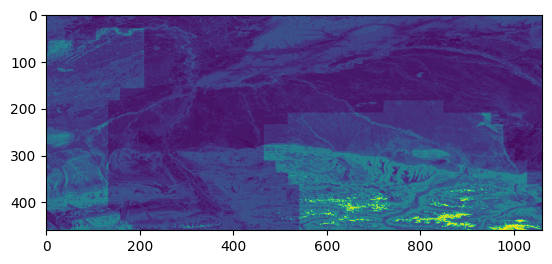

(-149.97104173790177, 0.0026949458523585646, 0.0, 64.98322933792207, 0.0, -0.0026949458523585646)


In [3]:
friction, frictionGeotransform = readFrictionTiff('/content/drive/MyDrive/TransmissionCosts/FbxToHealyFrictionMap.tif')
plt.imshow(friction)
plt.show()
print(frictionGeotransform)

In [4]:
print(type(friction))

<class 'numpy.ndarray'>


Initialize the rastergraph datastructure

In [5]:
myGraph = RasterGraph(friction, frictionGeotransform)

Dijkstra's algorithm can be run all at once

In [6]:
CCarr, pathInfo = myGraph.dijkstrasAlgorithm(((0,0),), (200, 400))
path = pathInfo[0]
length = pathInfo[1]
tree = pathInfo[2]


Or it can be run as two separate functions to build the costmap and trace the path

In [7]:
split_cost = myGraph.buildCumulativeCost(((0,0),))
split_path = myGraph.tracebackPath(tree, (200, 400))

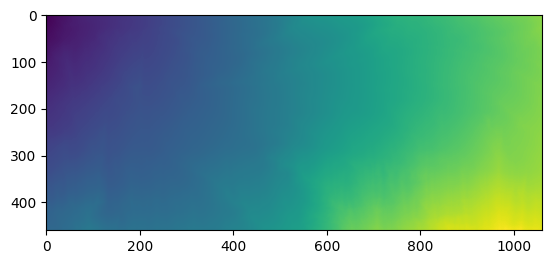

In [8]:
plt.imshow(CCarr)

In [9]:
pathArr = myGraph.pathToArray(path, width=1)
widePathArr = myGraph.pathToArray(path, width=5)

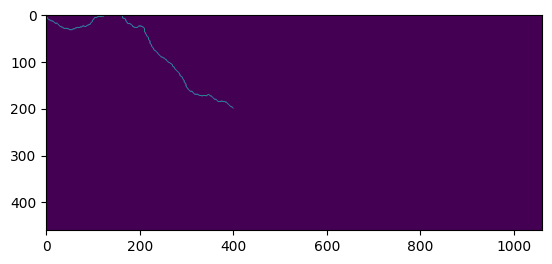

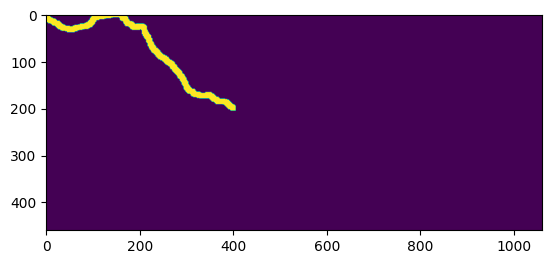

In [10]:
plt.imshow(pathArr)
plt.show()
plt.imshow(widePathArr)